# GRIP: The Sparks Foundation

# gripaugust2021

Author: Netra Kulkarni

Data Science and Business Analytics Intern

Task 2: Prediction using unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reading the dataset

In [6]:
df = pd.read_csv('Iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Exploring the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [30]:
# Making a table of Iris species with their count 
iris_table = pd.crosstab(index=df['Species'], columns='count')      
iris_table

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Preparing the required data

In [15]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [93]:
# x = df.drop(['Id','Species'],axis=1)
x = df.iloc[:, [1, 2, 3, 4]].values


Now we will decide the number of clusters i.e. k by Elbow method

In [84]:
from sklearn.cluster import KMeans
ssd = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(x)
    
    ssd.append(model.inertia_)

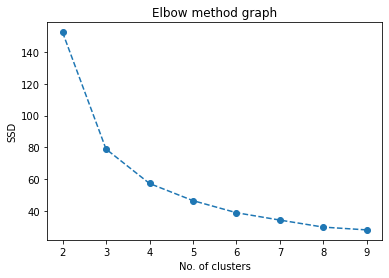

In [85]:
plt.plot(range(2,10), ssd, 'o--')
plt.title('Elbow method graph')
plt.xlabel('No. of clusters')
plt.ylabel('SSD')
plt.show()

 The optimum clusters is where the elbow occurs. This is when the sum of square of distances(ssd) doesn't decrease significantly with every iteration. Here we note that k=3

Applying K-Means algorithm to the dataset 

In [88]:
# kmeans = KMeans(n_clusters=3)
# y_kmeans = kmeans.fit_predict(x)
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

In [89]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [90]:
centroids = kmeans.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Visualizing the clusters

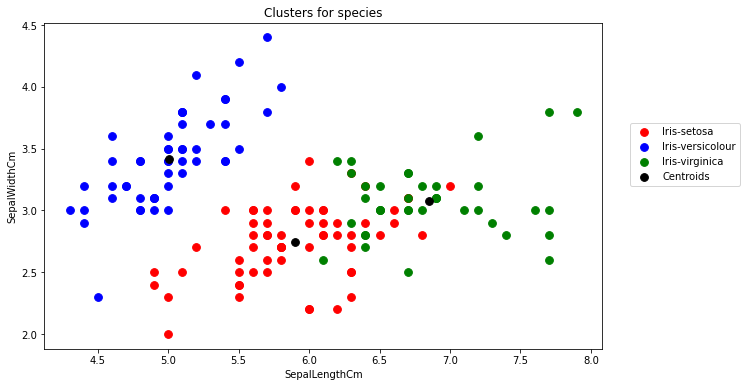

In [95]:
# based on sepallength and sepalwidth only
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 60, c = 'black', label = 'Centroids')

plt.title('Clusters for species')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(loc=(1.05,0.5))
plt.show()